# Data visualisation

- David Landa <david.landa@natur.cuni.cz>

## What we will learn

- Create a plot with descrete values
- Create a plot with continuous values
- Create a group of plots (subplot)
- Save a plot as PNG/JPG image

## What should plot contain?

- Title 
- Axis description
- ...

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

# Procedural interface

We will show the procedural interface which imitates the MATLAB and then we will __never use it again__! This style is oudated and use the state machine aproach which implicitly modify you figure. You will find this in many old tutorials or in the answers on stackoverflow.com. This style is deprecated. From now you will be able to recognize this style when you will search ypur problem on the web and you will search for another one, once you recognize this.)

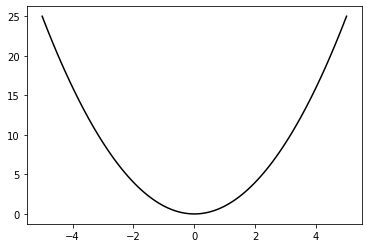

In [96]:
x_values = np.linspace(-5, 5, 100)
y_values = x_values ** 2

plt.plot(x_values, y_values, color='black') # Don't use it anymore!

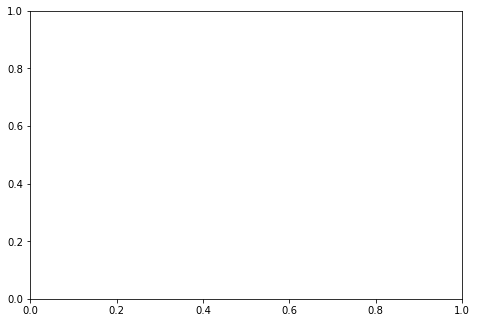

In [98]:
# Funkce `figure()` vrací instanci třídy `Figure`.

figure1 = plt.figure()
axes = figure1.add_axes([0, 0, 1, 1]) 

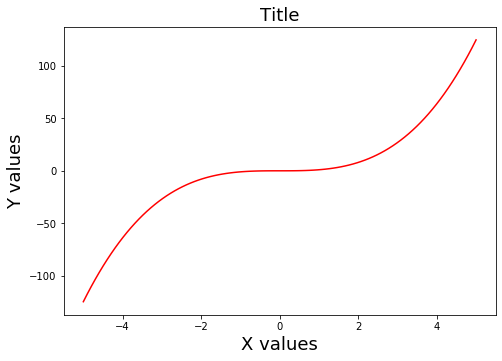

In [99]:
# Což není to samé jako zavolat přímo konstruktor Figure()?

figure = plt.figure()
figure.add_axes([0, 0, 1, 1])

figure.axes[0].set_title("Title", fontsize=18)
figure.axes[0].set_xlabel("X values", fontsize=18)
figure.axes[0].set_ylabel("Y values", fontsize=18)


# Generujeme hodnoty pro `f(x)`.
xx = np.linspace(-5, 5, 100)
yy = xx ** 3

figure.axes[0].plot(xx, yy, "r")


### Graf s osami na středu

Pokud chceme vykreslit graf s osami na středu namísto na krajích, musíme je tam explicitně přemístit a vypnout zobrazování okrajů.

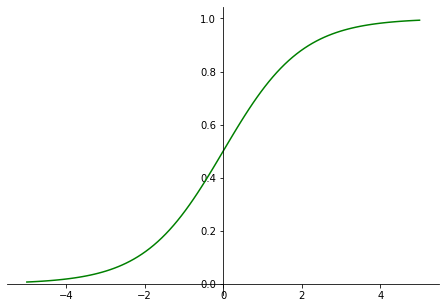

In [108]:
import math

figure = plt.figure()

ax = figure.add_axes([0, 0, 1, 1])

def sigmoid(xx):
    return [(1/(1 + math.exp(-x))) for x in xx]

xx = np.linspace(-5, 5, 100)
yy = sigmoid(xx)

ax.spines['left'].set_position(('data', 0.0))
ax.spines['bottom'].set_position(("data", 0.0)) # ("center")

# Nezobrazuj horní a pravou osu.

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

figure.axes[0].plot(xx, yy, "g")


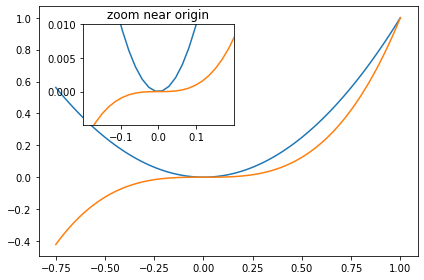

In [109]:
xx = np.linspace(-0.75, 1., 100)

fig, ax = plt.subplots()

ax.plot(xx, xx**2, xx, xx**3)
fig.tight_layout()

# inset
inset_ax = fig.add_axes([0.2, 0.55, 0.35, 0.35]) # X, Y, width, height

inset_ax.plot(xx, xx**2, xx, xx**3)
inset_ax.set_title('zoom near origin')

# set axis range
inset_ax.set_xlim(-.2, .2)
inset_ax.set_ylim(-.005, .01)

# set axis tick locations
inset_ax.set_yticks([0, 0.005, 0.01])
inset_ax.set_xticks([-0.1,0,.1]);

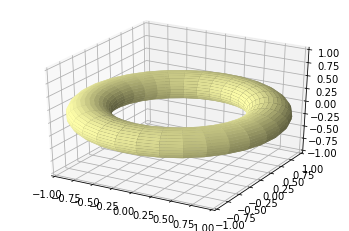

In [123]:
# Vykreslení parametrické křivky

from mpl_toolkits.mplot3d import Axes3D

# Generate torus mesh
angle = np.linspace(0, 2 * np.pi, 32)
theta, phi = np.meshgrid(angle, angle)
r, R = .25, 1.

X = (R + r * np.cos(phi)) * np.cos(theta)
Y = (R + r * np.cos(phi)) * np.sin(theta)
Z = r * np.sin(phi)

# Display the mesh
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.plot_surface(X, Y, Z, color = "#ffffaa", rstride = 1, cstride = 1)
plt.show()

# A torus is a surface that can be parameterized with two parameters, 
# theta and phi, varying from 0 to 2 * pi, as shown in the following code:


# Multiple plots

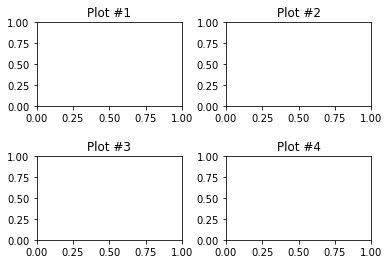

In [124]:
figure = plt.figure()
for i in range(1, 5):
    figure.add_subplot(2, 2, i).set_title(f"Plot #{i}")
    
figure.subplots_adjust(wspace=0.3, hspace=0.6)

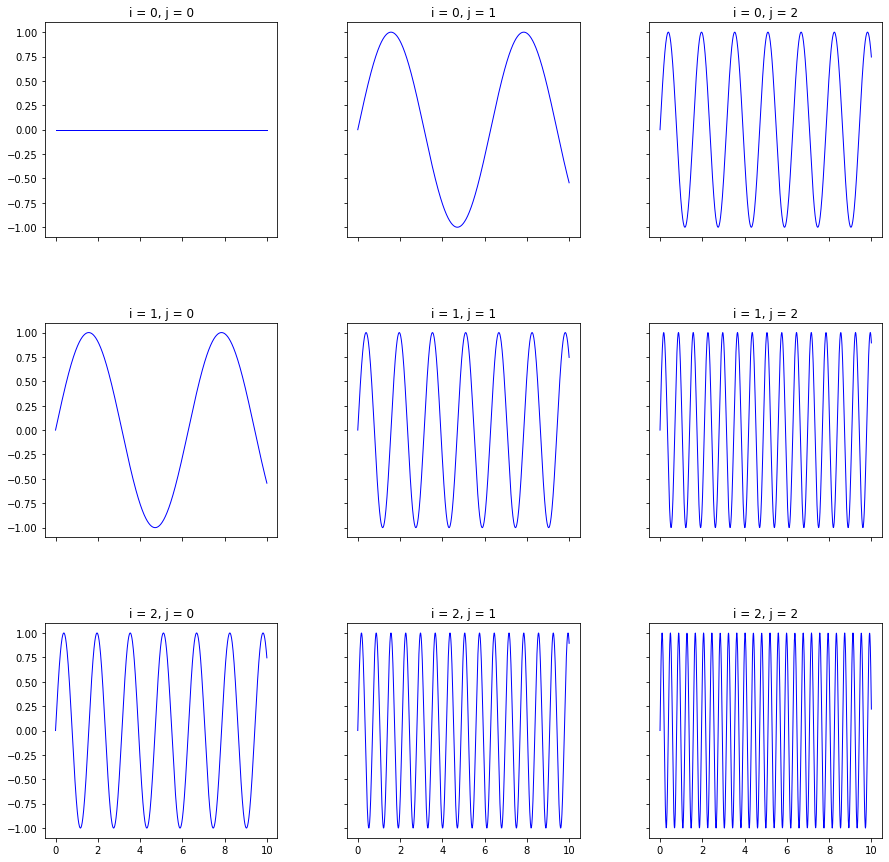

In [127]:
xs = np.linspace(0, 10, 1000)

figure, axes = plt.subplots(3, 3, sharex = True, sharey = True, figsize=(15, 15))
figure.subplots_adjust(wspace = 0.3, hspace = 0.4)
for i, j in itertools.product([0, 1, 2], repeat = 2):
    axes[i][j].set_title(f"i = {i}, j = {j}")
    axes[i][j].plot(xs, np.sin((i + j)**2 * xs), color="blue", linewidth=1)
    
    #axes[i][j].spines['right'].set_color('none')
    #axes[i][j].spines['top'].set_color('none')

- https://realpython.com/python-matplotlib-guide/
- https://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html
- https://pbpython.com/effective-matplotlib.html
